<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/8_expert_mode/2)%20Create%20experiment%20from%20scratch%20-%20Pytorch%20backend%20-%20train%2C%20validate%2C%20infer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to use full potential of monk in it's expert mode

# Table of Contents


## [0. Install](#0)


## [1. Load data, setup model, select params, and Train](#1)


## [2. Run validation on trained classifier](#2)


## [3. Run inferencing on trained classifier](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 2921 (delta 128), reused 44 (delta 20), pack-reused 2682
Receiving objects: 100% (2921/2921), 81.09 MiB | 2.22 MiB/s, done.
Resolving deltas: 100% (1673/1673), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Natural Images Classification
    - https://www.kaggle.com/prasunroy/natural-images

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sbQ_KaEDd7kRrTvna-4odLqxM2G0QT0Z" -O natural-images.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq natural-images.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using pytorch backend 
from pytorch_prototype import prototype

<a id='1'></a>
# Load data, setup model, select params, and Train

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode");

Pytorch Version: 1.2.0

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/



## Set Data params

In [4]:
gtf.Dataset_Params(dataset_path="natural-images/train", 
                   
                   split=0.9,
                    
                   input_size=224, 
                   
                   batch_size=16, 
                   
                   shuffle_data=True, 
                   
                   num_processors=3);

Dataset Details
    Train path:     natural-images/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  16
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9



## Apply Transforms

In [5]:
gtf.apply_random_horizontal_flip(train=True, val=True);
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

## Load Dataset

In [6]:
gtf.Dataset();

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 6209
    Num val images:   690
    Num classes:      8



## Set Model Params

In [7]:
gtf.Model_Params(model_name="resnet18", 
                 
                 freeze_base_network=True, 
                 
                 use_gpu=True, 
                 
                 use_pretrained=True);

Model Params
    Model name:           resnet18
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True



## Append Custom layers to transfer learning base model

In [8]:
gtf.append_dropout(probability=0.1);
gtf.append_linear(final_layer=True);

## Load Model

In [9]:
gtf.Model();

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18
        Num layers in model:  41
        Num trainable layers: 1



## Freeze first few layers

In [10]:
gtf.Freeze_Layers(num=10);

Model params post freezing
    Num trainable layers: 32



## Set Training params

In [11]:
gtf.Training_Params(num_epochs=10, 
                    
                    display_progress=True, 
                    
                    display_progress_realtime=True, 
        
                    save_intermediate_models=True, 
                    
                    intermediate_model_prefix="intermediate_model_", 
                    
                    save_training_logs=True);

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



In [12]:
## Set Optimizer, losses and learning rate schedulers

In [13]:
gtf.optimizer_sgd(0.001);

Optimizer
    Name:          sgd
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





In [14]:
gtf.lr_fixed();

Learning rate scheduler
    Name:   fixed
    Params: {}



In [15]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [16]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.891, Train-loss: 0.627 | Val-acc: 1.000000, Val-loss: 0.092, | time: 19.9 sec

    Epoch 2/10
    ----------




    curr_lr - 0.001
    [Epoch 2] Train-acc: 0.986, Train-loss: 0.137 | Val-acc: 0.998551, Val-loss: 0.039, | time: 18.5 sec

    Epoch 3/10
    ----------




    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.988, Train-loss: 0.094 | Val-acc: 0.998551, Val-loss: 0.024, | time: 17.5 sec

    Epoch 4/10
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.990, Train-loss: 0.072 | Val-acc: 1.000000, Val-loss: 0.016, | time: 17.9 sec

    Epoch 5/10
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.990, Train-loss: 0.058 | Val-acc: 0.998551, Val-loss: 0.013, | time: 17.6 sec

    Epoch 6/10
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.990, Train-loss: 0.052 | Val-acc: 0.998551, Val-loss: 0.011, | time: 18.2 sec

    Epoch 7/10
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.993, Train-loss: 0.045 | Val-acc: 0.998551, Val-loss: 0.008, | time: 18.1 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.991, Train-loss: 0.043 | Val-acc: 1.000000, Val-loss: 0.006, | time: 17.7 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.991, Train-loss: 0.040 | Val-acc: 1.000000, Val-loss: 0.007, | time: 17.6 sec

    Epoch 10/10
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.993, Train-loss: 0.034 | Val-acc: 1.000000, Val-loss: 0.006, | time: 17.1 sec

    Training completed in: 2m 57s
    Best val Acc:          1.000000

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_los

<Figure size 432x288 with 0 Axes>

<a id='2'></a>
# Validating the trained classifier

In [17]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode", eval_infer=True);

# Just for example purposes, validating on the training set itself
gtf.Dataset_Params(dataset_path="natural-images/train");
gtf.Dataset();

accuracy, class_based_accuracy = gtf.Evaluate();

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/project/expert_mode/output/models/final
    Model loaded!

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/

Dataset Details
    Test path:     natural-images/train
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   3

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 6899
    Num classes:      8

Testing



    Result
        class based accuracies
            0. airplane - 100.0 %
            1. car - 100.0 %
            2. cat - 100.0 %
            3. dog - 99.43019943019942 %
            4. flower - 99.88137603795967 %
            5. fruit - 100.0 %
            6. motorbike - 100.0 %
            7. person - 100.0 %
        total images:            6899
        num correct predictions: 6894
        Average accuracy (%):    99.92752572836643



<a id='3'></a>
# Running inference on test images

In [18]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "expert_mode", eval_infer=True);

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/project/expert_mode/output/models/final
    Model loaded!

Experiment Details
    Project: project
    Experiment: expert_mode
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/8_expert_mode/workspace/project/expert_mode/



Prediction
    Image name:         natural-images/test/test1.jpg
    Predicted class:      airplane
    Predicted score:      6.849637031555176



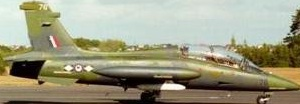

In [19]:
img_name = "natural-images/test/test1.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         natural-images/test/test2.jpg
    Predicted class:      cat
    Predicted score:      13.884509086608887



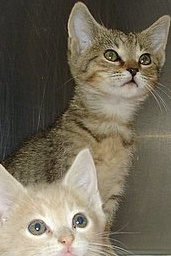

In [20]:
img_name = "natural-images/test/test2.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         natural-images/test/test3.jpg
    Predicted class:      fruit
    Predicted score:      8.16602611541748



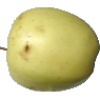

In [21]:
img_name = "natural-images/test/test3.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 